In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2020-12-10T17:00:00,12,Lazio,3036,339,3375,87392,90767,-3051,1488,...,68.0,15916.0,8874.0,-2975.0,10.04,3.72,9.35,16.77,-0.88,-3.25
290,2020-12-11T17:00:00,12,Lazio,3026,339,3365,84828,88193,-2574,1230,...,68.0,14917.0,7330.0,-2564.0,10.07,3.82,8.25,16.78,0.00,-2.84
291,2020-12-12T17:00:00,12,Lazio,2969,337,3306,84012,87318,-875,1194,...,41.0,16086.0,8224.0,-816.0,10.19,3.79,7.42,14.52,-0.59,-0.99
292,2020-12-13T17:00:00,12,Lazio,2937,341,3278,83331,86609,-709,1339,...,27.0,14815.0,8735.0,-681.0,10.40,3.78,9.04,15.33,1.19,-0.81


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1315
Nuovi tamponi: 13565.0
Percentuale nuovi positivi/nuovi tamponi: 9.700000000000001 %
Nuovi guariti: 2037.0
Nuovi deceduti: 38.0
Variazione positivi ricoverati con sintomi: 1.0
Variazione positivi in terapia intensiva: 6.0
Variazione positivi in isolamento dimiciliare: -767.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-15T17:00:00,12,Lazio,969,90,1059,10546,11605,542,594,...,7.0,15930.0,12279.0,505.0,8.50,9.13,3.73,4.84,5.88,4.90
1,2020-10-16T17:00:00,12,Lazio,1004,98,1102,11215,12317,712,795,...,5.0,19438.0,16195.0,669.0,8.89,8.95,4.09,4.91,8.89,6.14
2,2020-10-17T17:00:00,12,Lazio,1043,98,1141,12096,13237,920,994,...,12.0,27748.0,23129.0,881.0,8.59,8.62,3.58,4.30,0.00,7.47
3,2020-10-18T17:00:00,12,Lazio,1085,99,1184,13196,14380,1143,1198,...,6.0,23010.0,17461.0,1100.0,8.36,8.23,5.21,6.86,1.02,8.63
4,2020-10-19T17:00:00,12,Lazio,1130,111,1241,13950,15191,811,939,...,9.0,17573.0,12645.0,754.0,8.94,8.17,5.34,7.43,12.12,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-10T17:00:00,12,Lazio,3036,339,3375,87392,90767,-3051,1488,...,68.0,15916.0,8874.0,-2975.0,10.04,3.72,9.35,16.77,-0.88,-3.25
57,2020-12-11T17:00:00,12,Lazio,3026,339,3365,84828,88193,-2574,1230,...,68.0,14917.0,7330.0,-2564.0,10.07,3.82,8.25,16.78,0.00,-2.84
58,2020-12-12T17:00:00,12,Lazio,2969,337,3306,84012,87318,-875,1194,...,41.0,16086.0,8224.0,-816.0,10.19,3.79,7.42,14.52,-0.59,-0.99
59,2020-12-13T17:00:00,12,Lazio,2937,341,3278,83331,86609,-709,1339,...,27.0,14815.0,8735.0,-681.0,10.40,3.78,9.04,15.33,1.19,-0.81


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

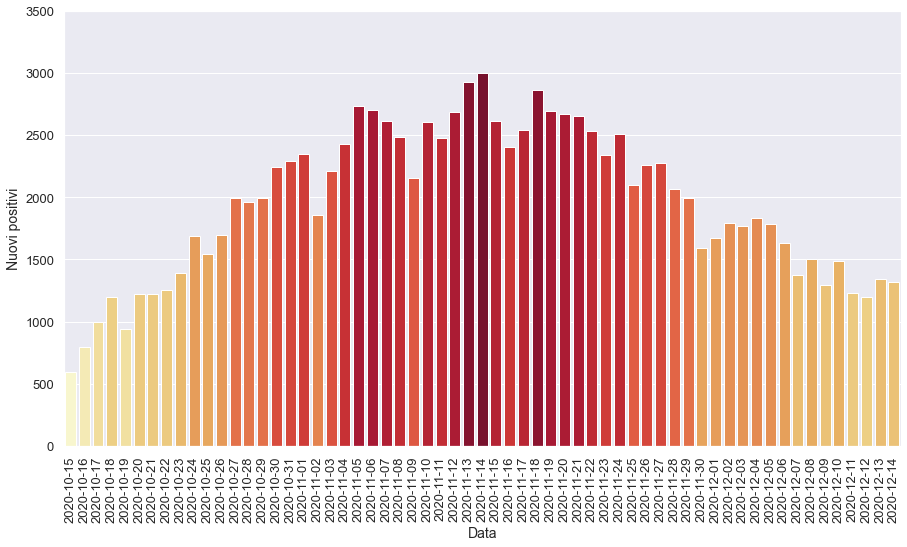

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

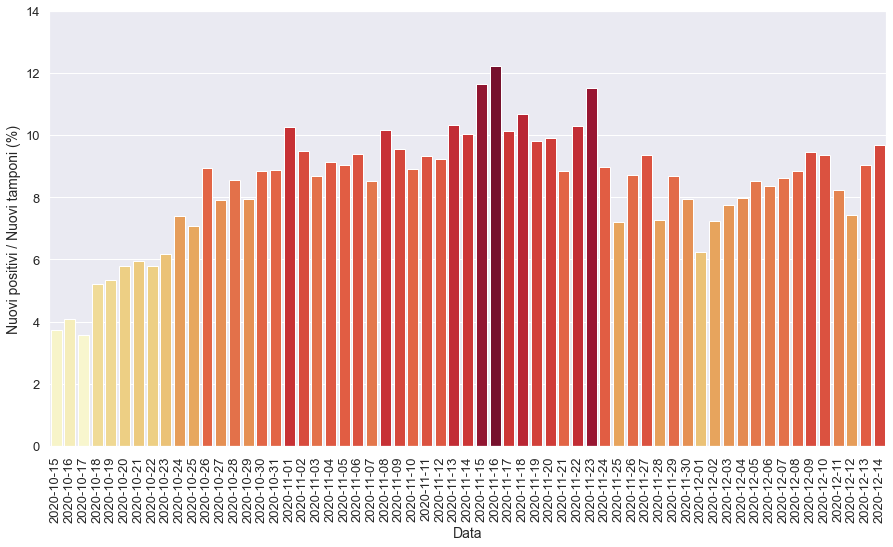

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

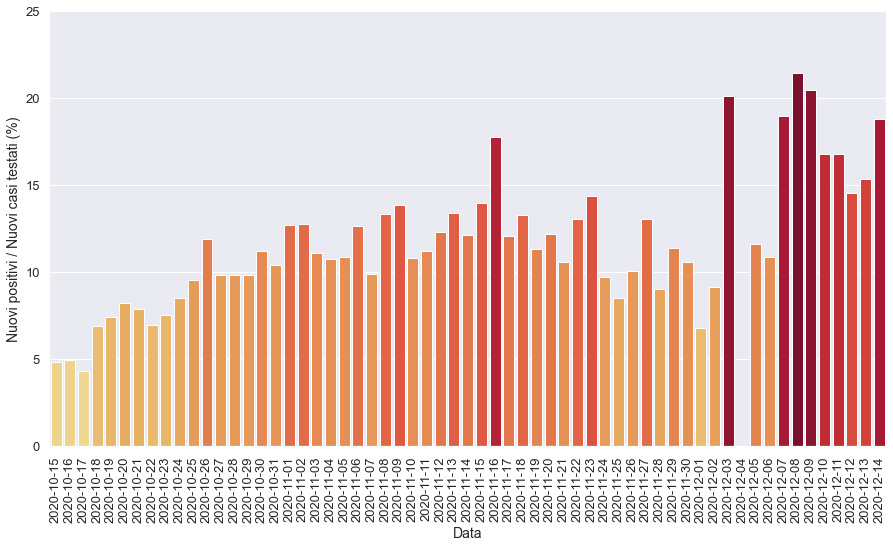

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

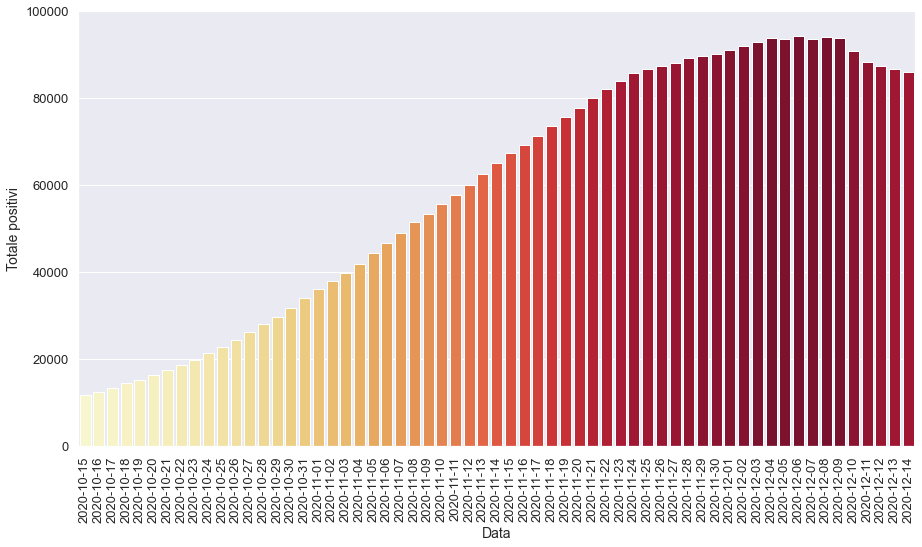

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

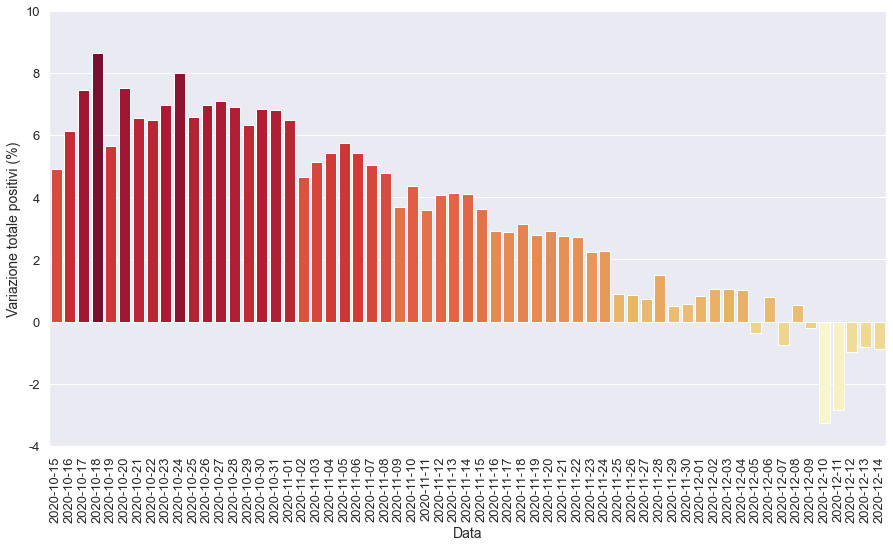

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

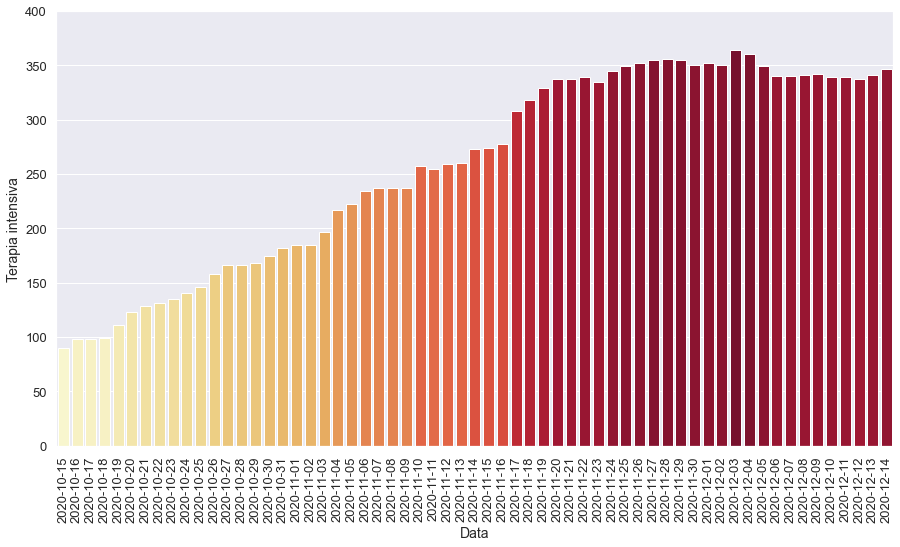

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

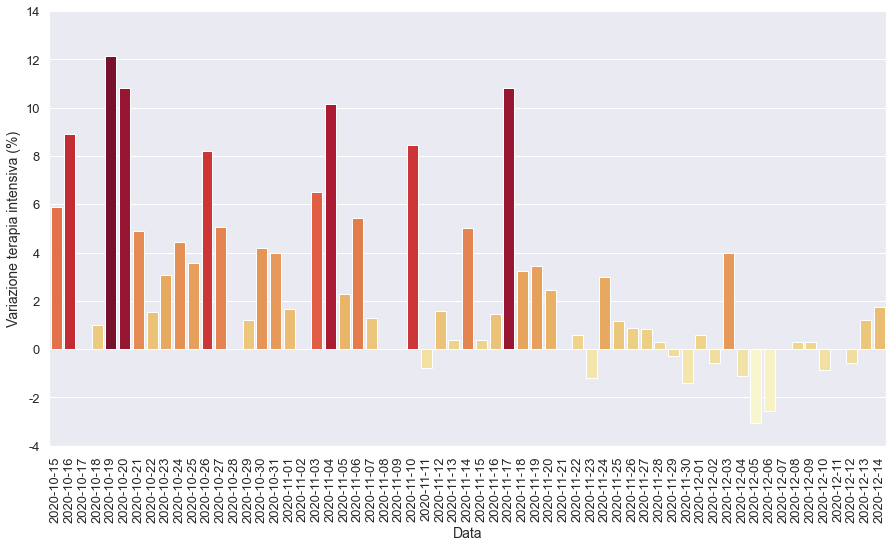

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

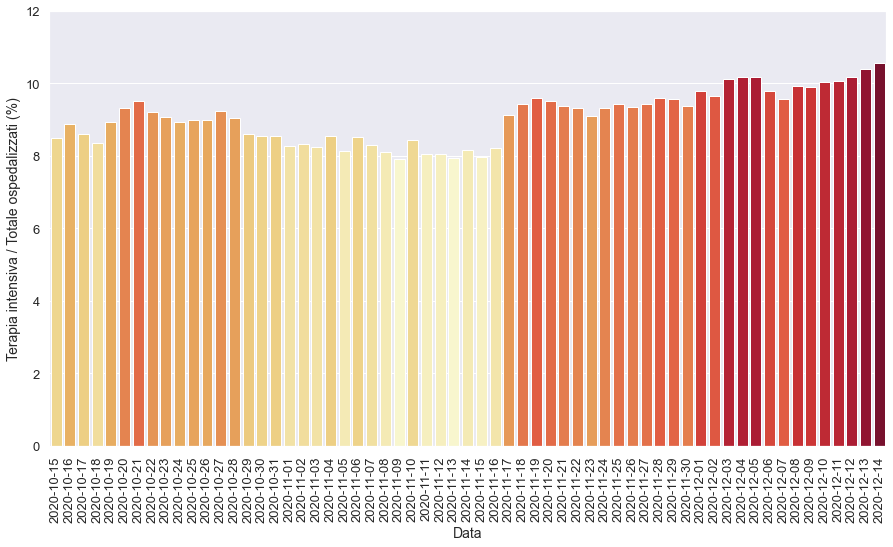

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

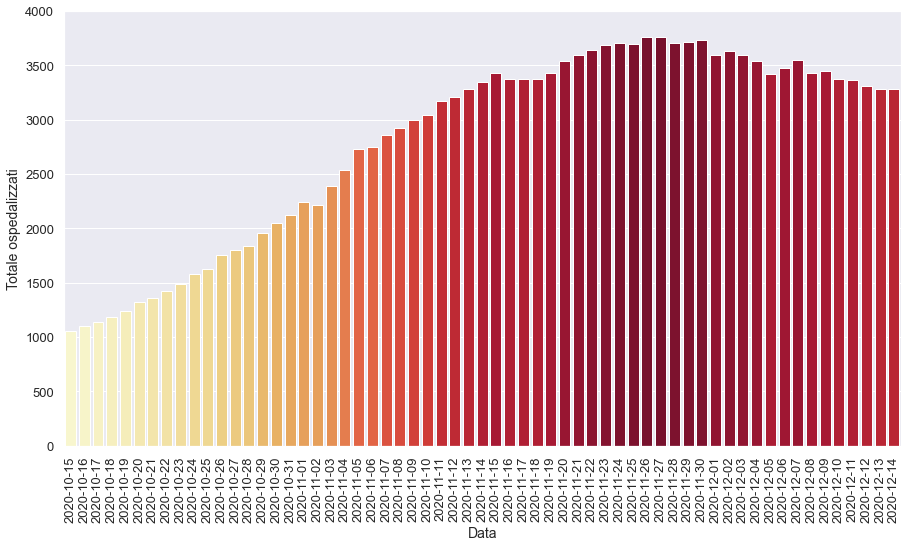

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

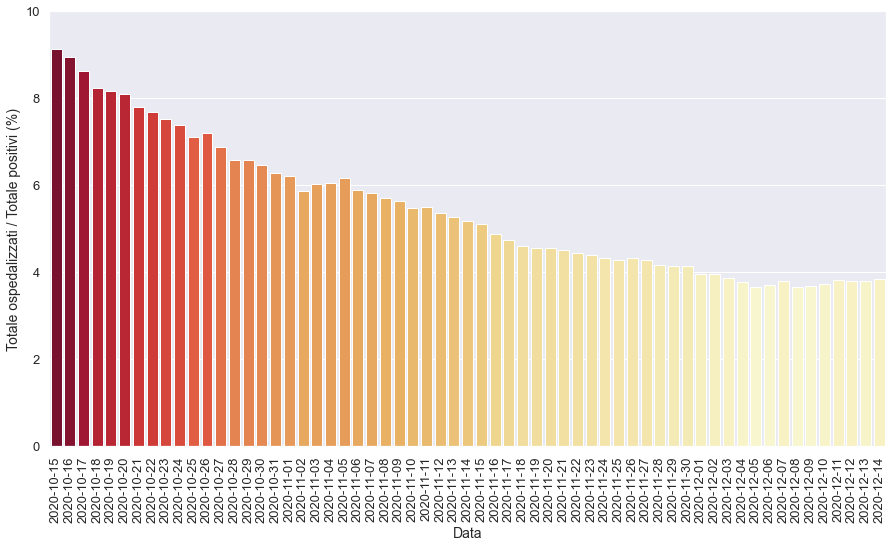

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

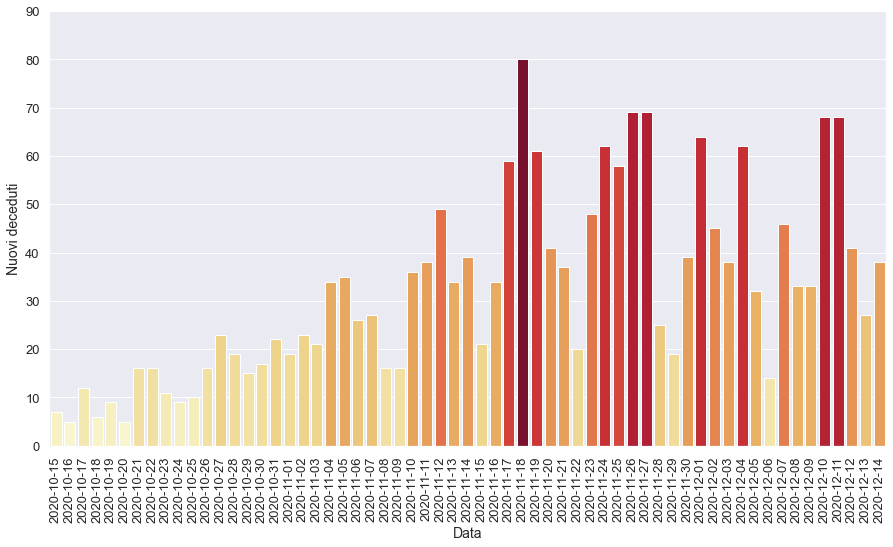

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

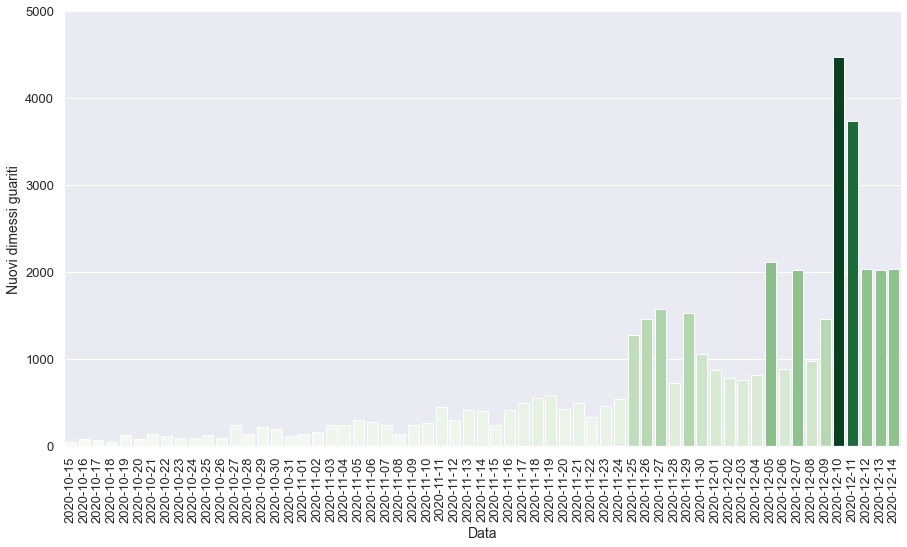

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-14T17:00:00,12,Lazio,3076,273,3349,61609,64958,2559,2997,...,39.0,29822.0,24696.0,2488.0,8.15,5.16,10.05,12.14,5.00,4.10
1,2020-11-15T17:00:00,12,Lazio,3159,274,3433,63876,67309,2351,2612,...,21.0,22434.0,18750.0,2267.0,7.98,5.10,11.64,13.93,0.37,3.62
2,2020-11-16T17:00:00,12,Lazio,3099,278,3377,65893,69270,1961,2407,...,34.0,19699.0,13538.0,2017.0,8.23,4.88,12.22,17.78,1.46,2.91
3,2020-11-17T17:00:00,12,Lazio,3066,308,3374,67881,71255,1985,2538,...,59.0,25058.0,21008.0,1988.0,9.13,4.74,10.13,12.08,10.79,2.87
4,2020-11-18T17:00:00,12,Lazio,3056,318,3374,70117,73491,2236,2866,...,80.0,26869.0,21558.0,2236.0,9.43,4.59,10.67,13.29,3.25,3.14
5,2020-11-19T17:00:00,12,Lazio,3103,329,3432,72109,75541,2050,2697,...,61.0,27519.0,23893.0,1992.0,9.59,4.54,9.80,11.29,3.46,2.79
6,2020-11-20T17:00:00,12,Lazio,3202,337,3539,74207,77746,2205,2667,...,41.0,26887.0,21922.0,2098.0,9.52,4.55,9.92,12.17,2.43,2.92
7,2020-11-21T17:00:00,12,Lazio,3257,337,3594,76282,79876,2130,2658,...,37.0,30046.0,25196.0,2075.0,9.38,4.50,8.85,10.55,0.00,2.74
8,2020-11-22T17:00:00,12,Lazio,3298,339,3637,78416,82053,2177,2533,...,20.0,24643.0,19410.0,2134.0,9.32,4.43,10.28,13.05,0.59,2.73
9,2020-11-23T17:00:00,12,Lazio,3351,335,3686,80203,83889,1836,2341,...,48.0,20324.0,16324.0,1787.0,9.09,4.39,11.52,14.34,-1.18,2.24


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

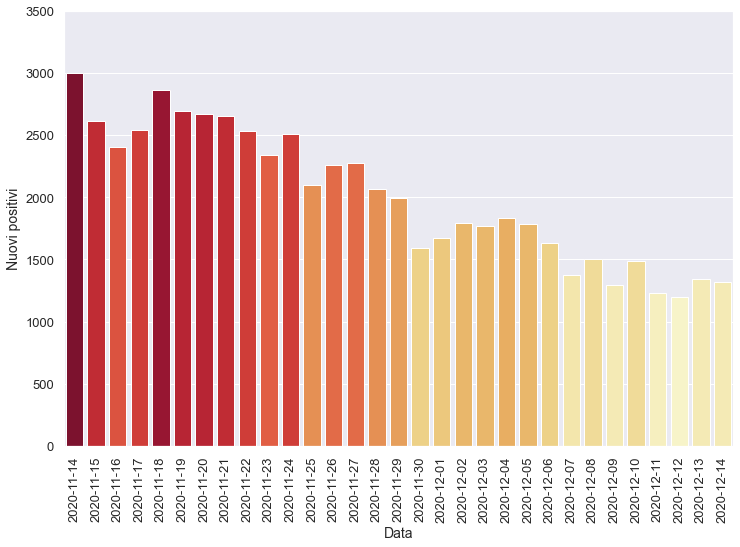

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

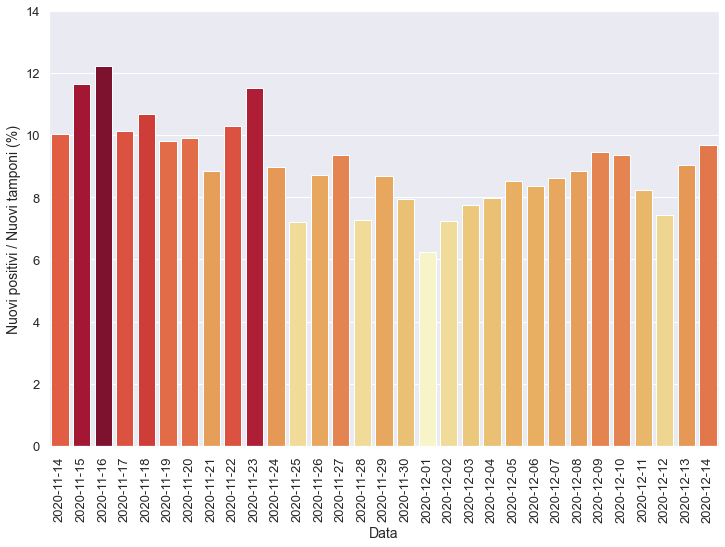

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

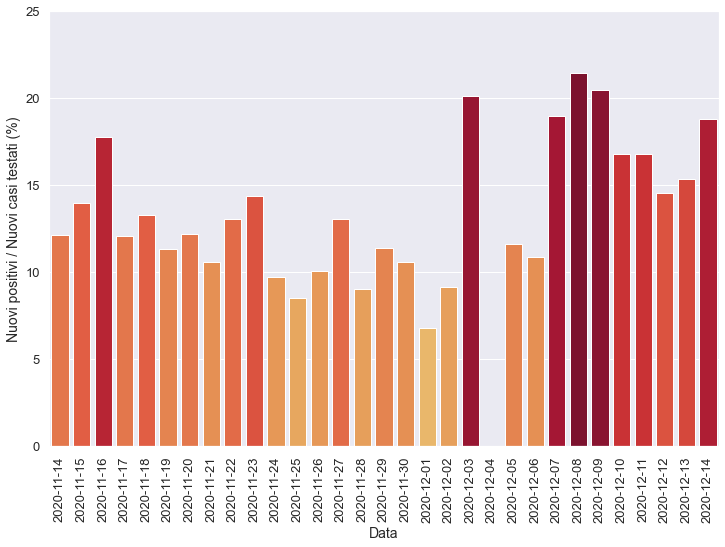

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

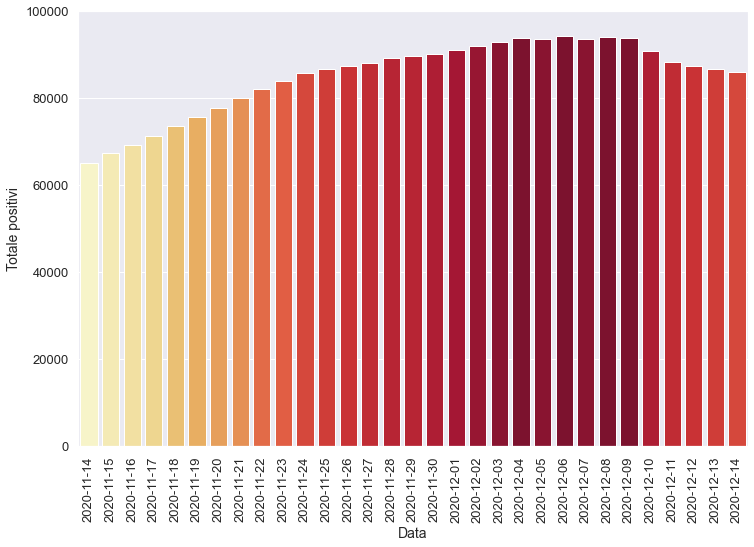

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

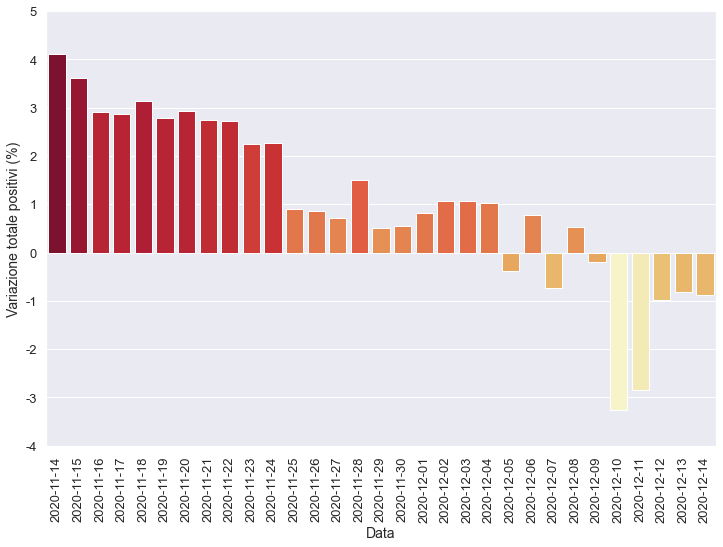

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

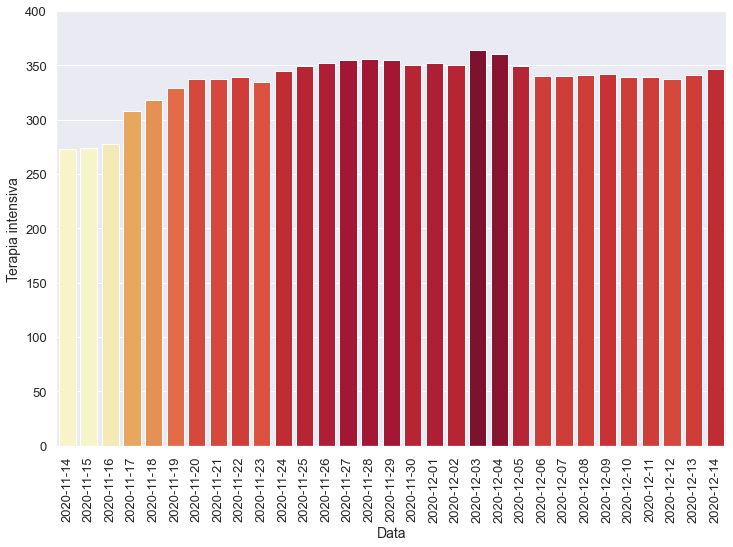

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

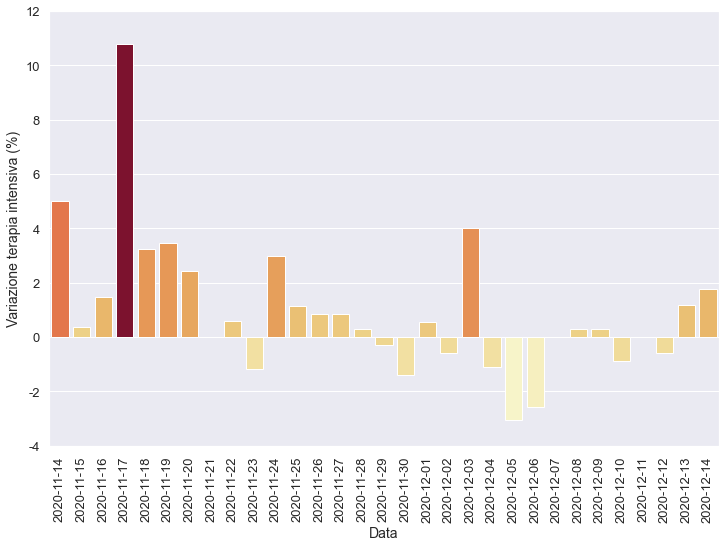

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

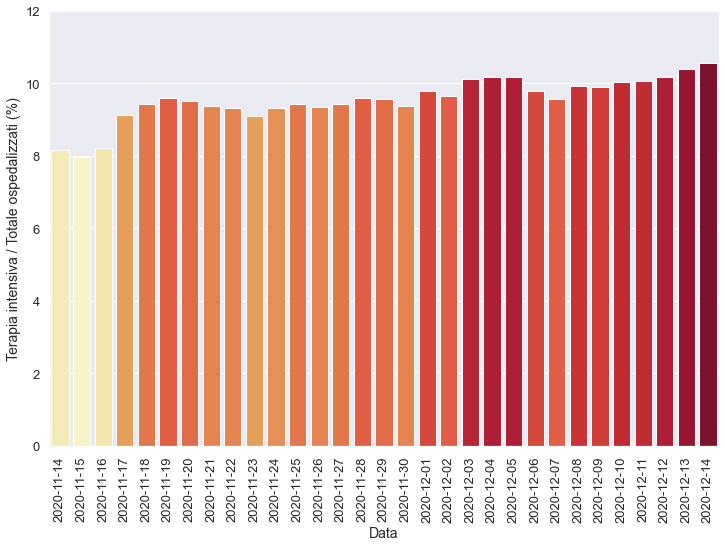

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

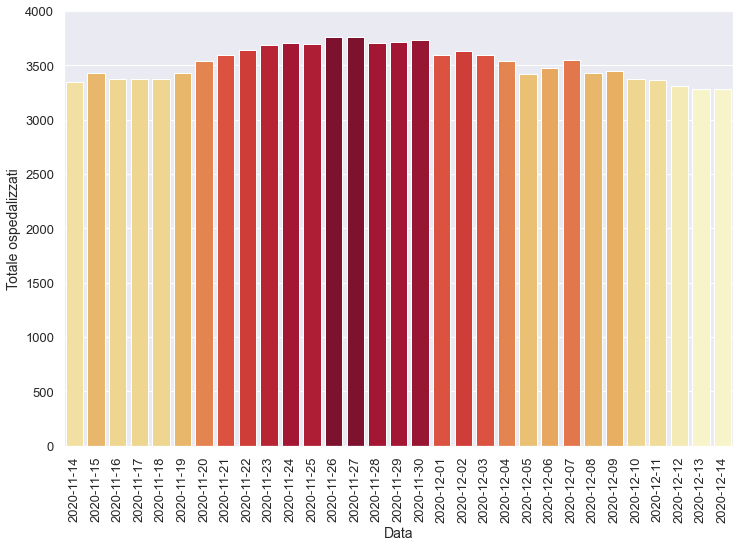

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

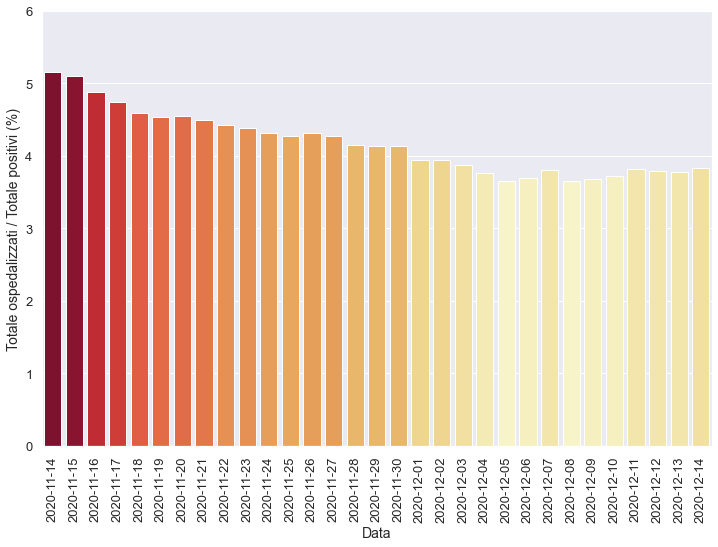

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

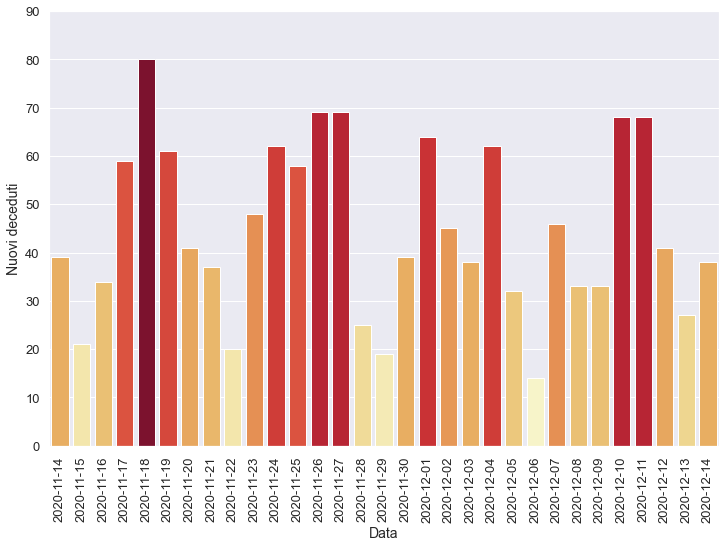

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

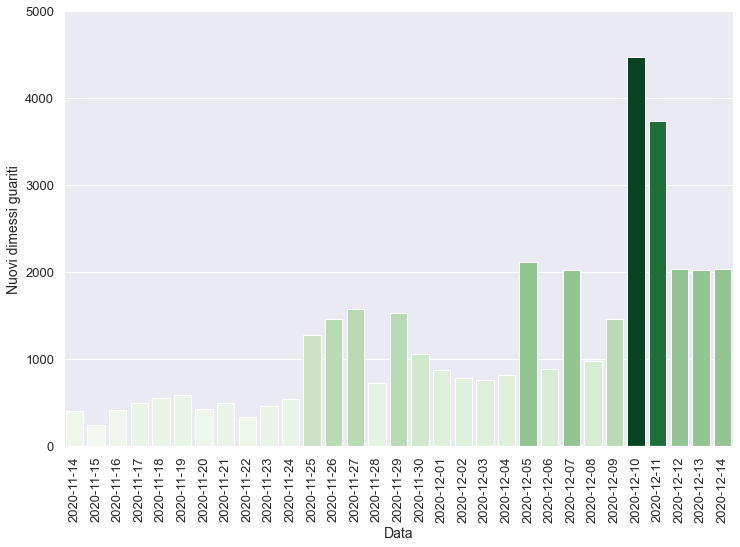

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-07T17:00:00,12,Lazio,3209,340,3549,89965,93514,-697,1372,...,46.0,15916.0,7234.0,-770.0,9.58,3.80,8.62,18.97,0.00,-0.74
1,2020-12-08T17:00:00,12,Lazio,3091,341,3432,90577,94009,495,1501,...,33.0,16935.0,7000.0,612.0,9.94,3.65,8.86,21.44,0.29,0.53
2,2020-12-09T17:00:00,12,Lazio,3109,342,3451,90367,93818,-191,1297,...,33.0,13724.0,6338.0,-210.0,9.91,3.68,9.45,20.46,0.29,-0.20
3,2020-12-10T17:00:00,12,Lazio,3036,339,3375,87392,90767,-3051,1488,...,68.0,15916.0,8874.0,-2975.0,10.04,3.72,9.35,16.77,-0.88,-3.25
4,2020-12-11T17:00:00,12,Lazio,3026,339,3365,84828,88193,-2574,1230,...,68.0,14917.0,7330.0,-2564.0,10.07,3.82,8.25,16.78,0.00,-2.84
5,2020-12-12T17:00:00,12,Lazio,2969,337,3306,84012,87318,-875,1194,...,41.0,16086.0,8224.0,-816.0,10.19,3.79,7.42,14.52,-0.59,-0.99
6,2020-12-13T17:00:00,12,Lazio,2937,341,3278,83331,86609,-709,1339,...,27.0,14815.0,8735.0,-681.0,10.40,3.78,9.04,15.33,1.19,-0.81
7,2020-12-14T17:00:00,12,Lazio,2938,347,3285,82564,85849,-760,1315,...,38.0,13565.0,7000.0,-767.0,10.56,3.83,9.69,18.79,1.76,-0.88


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

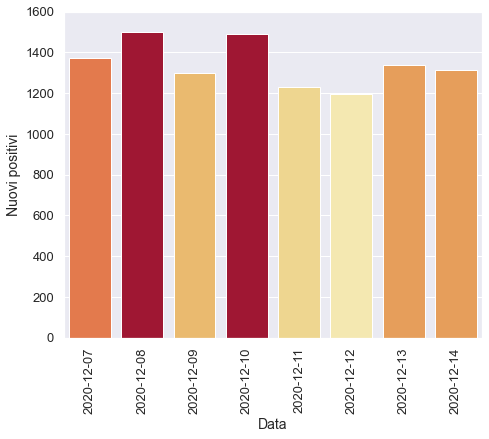

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

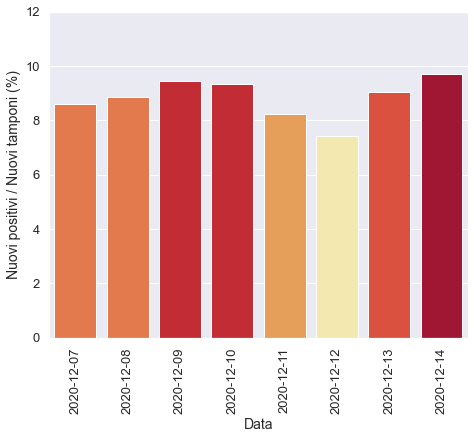

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

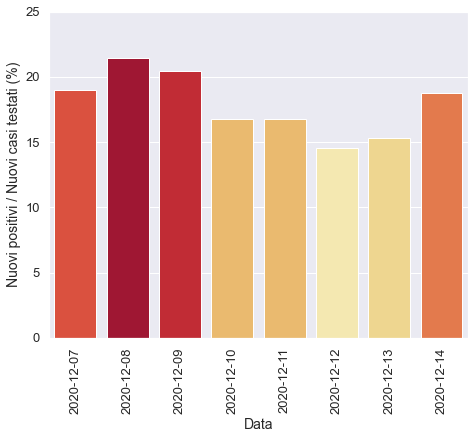

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

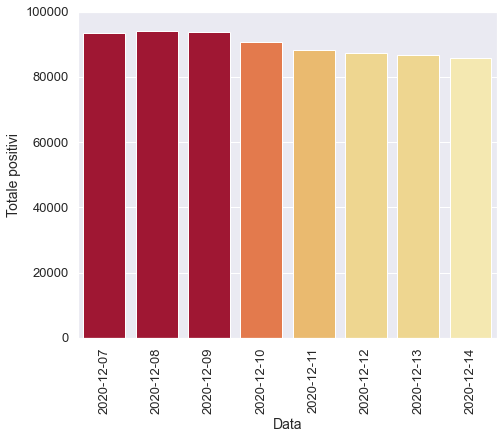

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

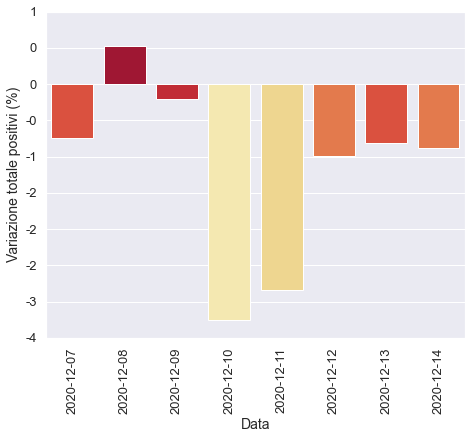

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

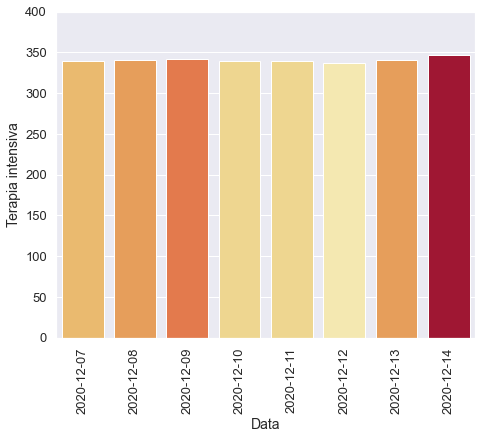

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

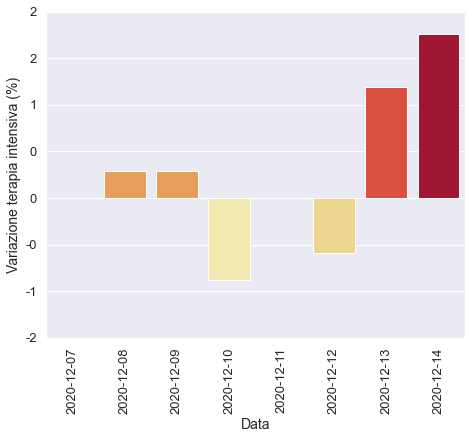

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

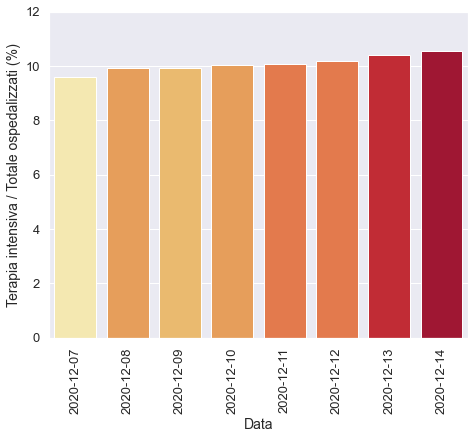

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

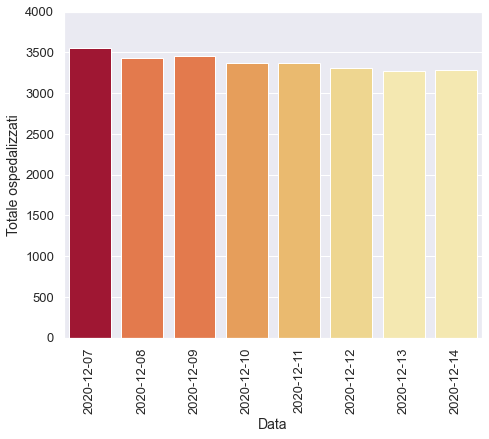

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

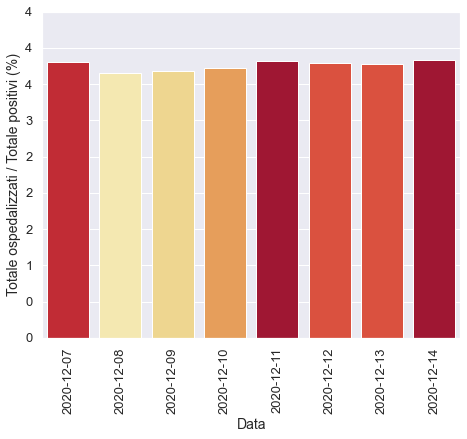

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

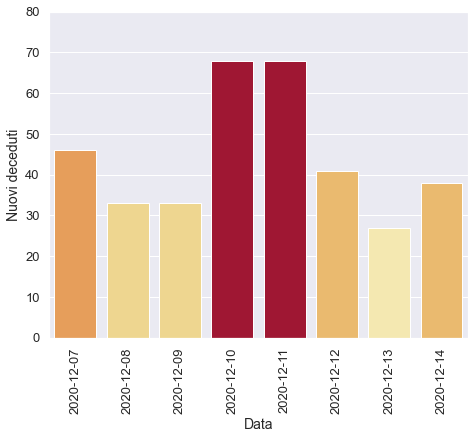

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

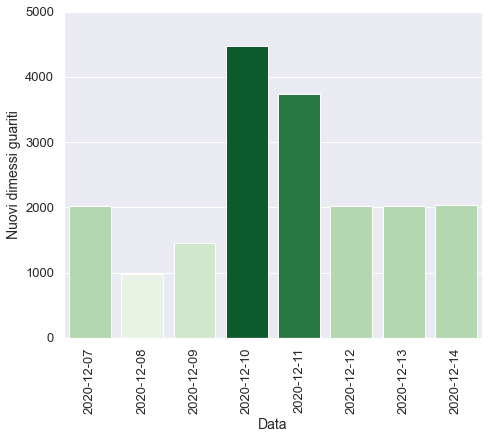

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)